In [14]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from dotenv import load_dotenv
load_dotenv()

True

In [15]:
from PIL import Image
from IPython.core.display import HTML
from functools import partial

from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.gqa import create_prompt
import warnings
from tqdm import TqdmWarning
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=TqdmWarning)

In [16]:
# It will take less than 5 min when first started.
interpreter = ProgramInterpreter(dataset='gqa')

Registering LOC step
Registering COUNT step
Registering CROP step
Registering CROP_RIGHTOF step
Registering CROP_LEFTOF step
Registering CROP_FRONTOF step
Registering CROP_INFRONTOF step
Registering CROP_INFRONT step
Registering CROP_BEHIND step
Registering CROP_AHEAD step
Registering CROP_BELOW step
Registering CROP_ABOVE step
Registering VQA step
Registering EVAL step
Registering RESULT step


In [17]:
prompter = partial(create_prompt,method='all')
generator = ProgramGenerator(prompter=prompter, 
                             model="gpt-3.5-turbo-instruct")

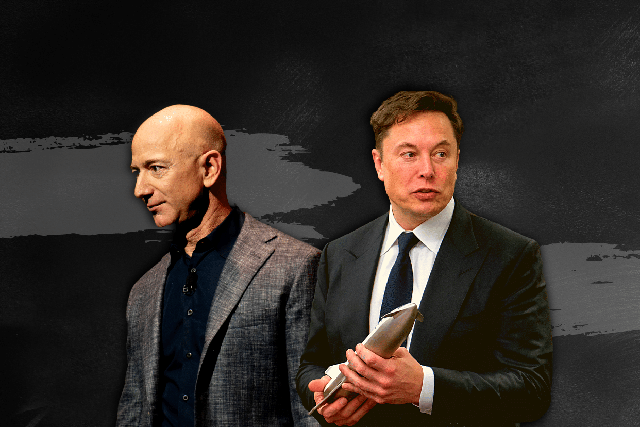

In [18]:
image = Image.open('../assets/people.png')
image.thumbnail((640,640),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB')
)
image

In [19]:
question = "How many people are in image?"

prog,_ = generator.generate(dict(question=question))
print(prog)

BOX0=LOC(image=IMAGE,object='person')
ANSWER0=COUNT(box=BOX0)
FINAL_RESULT=RESULT(var=ANSWER0)


LOC
COUNT
RESULT

ANSWER: 2



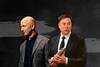
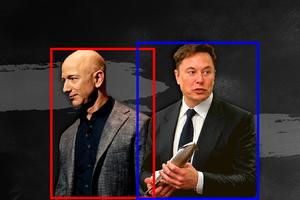
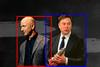

In [20]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)

print(f'\nANSWER: {result}')
HTML(html_str)